In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [4]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.shape

(41188, 21)

In [7]:
# Check the percentage of Missing and Null values

percentage_missing = df.isna().sum()/len(df)*100
percentage_null = df.isnull().sum()/len(df)*100
pc_df = pd.DataFrame(columns=df.columns, index=None)
pc_df.loc['Percentage Missing'] = percentage_missing
pc_df.loc['Percentage Null'] = percentage_null
pd.set_option('display.max_columns', None)
pc_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Percentage Missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


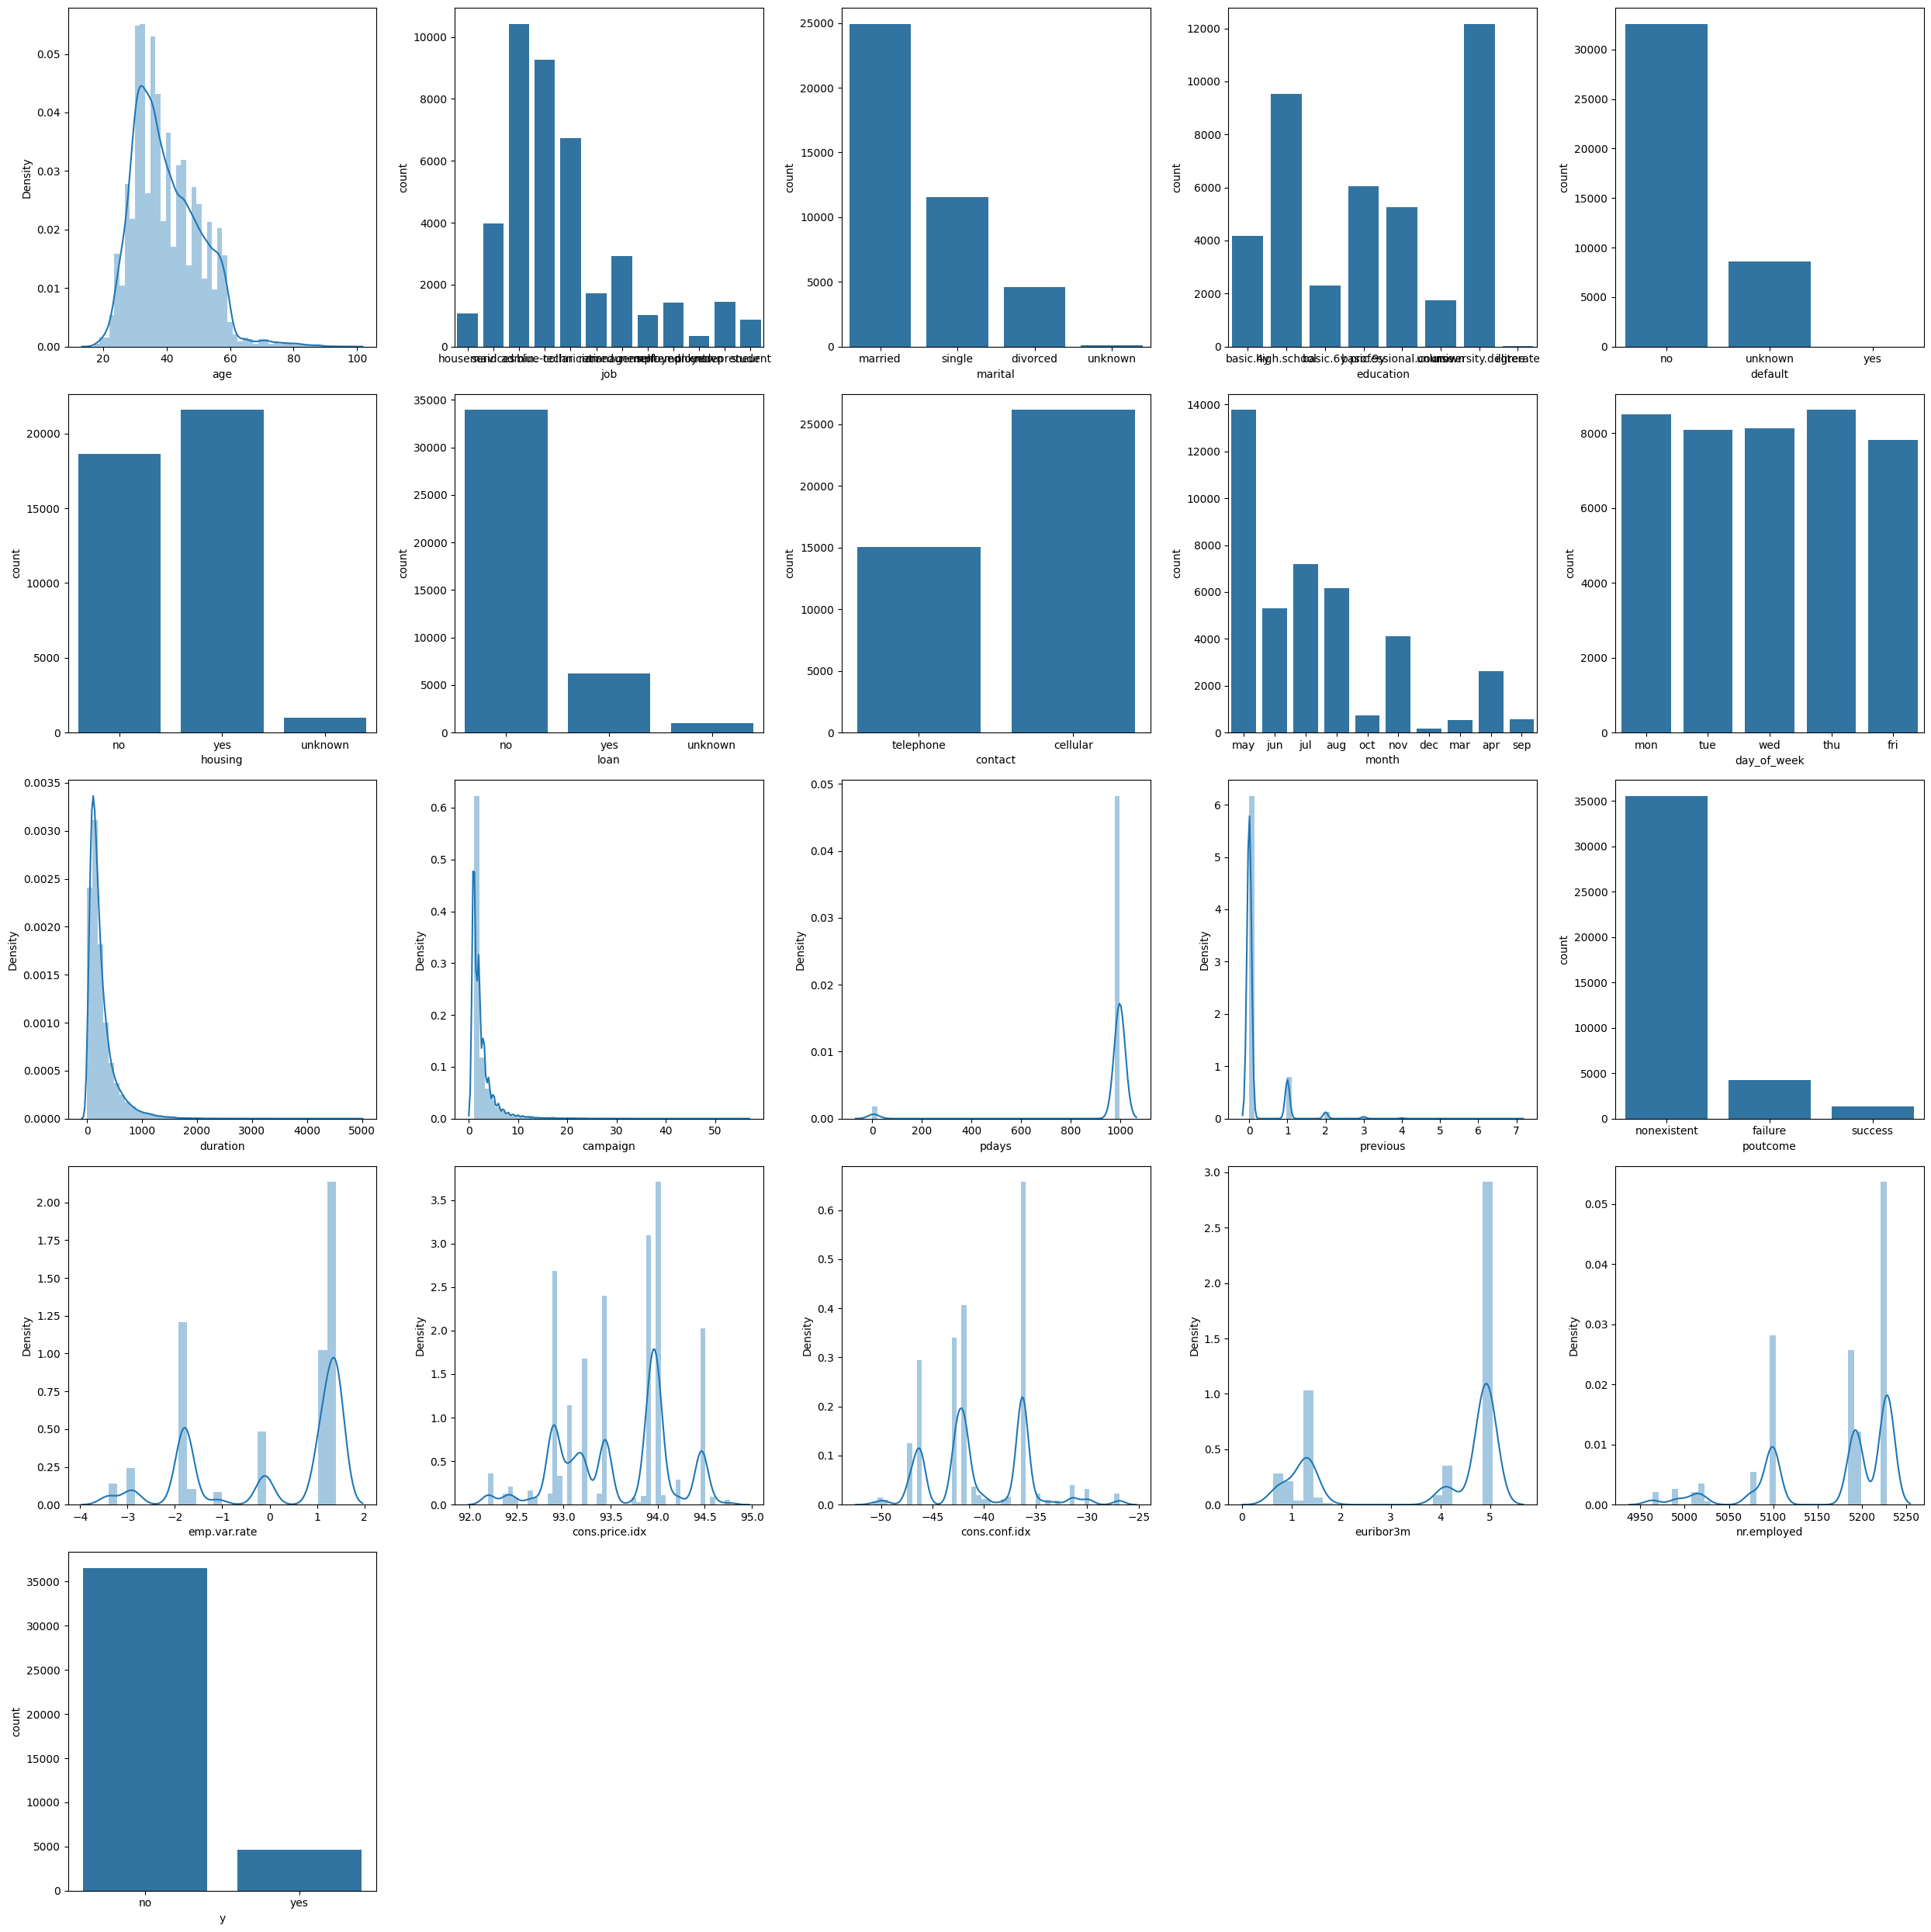

Number of Yes:4640 ; Number of No:36548 ; Percentage of Yes:11.27 % (Imbance Data)
pdays 999 count: 39673 ; Percentage of 999: 96.32 % (too many with 999)


In [8]:
# Produce Countplot and Distplot from the data;

plt.figure(figsize=(25,25))

for i, col in enumerate (df.columns):
    plt.subplot(5,5,i+1)
    plt.xlabel(col)

    if df[col].dtypes == 'object':
        sns.countplot(data=df, x=col)
    else:
        sns.distplot(df[col])

plt.tight_layout()
plt.show()

print(f"Number of Yes:{(df['y']=='yes').sum()} ; Number of No:{(df['y']=='no').sum()} ; Percentage of Yes:{round((df['y']=='yes').mean()*100,2)} % (Imbance Data)")
print(f"pdays 999 count: {(df['pdays']==999).sum()} ; Percentage of 999: {round((df['pdays']==999).mean()*100,2)} % (too many with 999)")

In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f'{column} : {df[column].unique()}')
        print(f'{round(df[column].value_counts(normalize=True)*100, 2)}')

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
job
admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: proportion, dtype: float64
marital : ['married' 'single' 'divorced' 'unknown']
marital
married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: proportion, dtype: float64
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
education
university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.

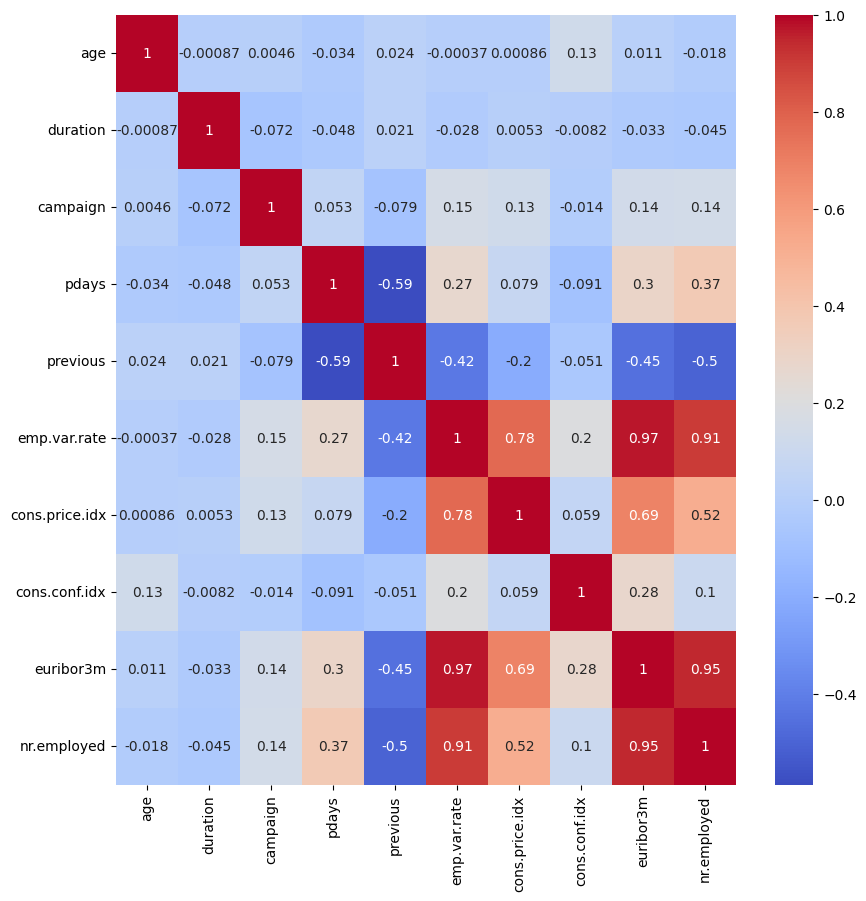

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

From the corelation matrix it is observd that emp.var.rate is very highly correlated with nr.employed (97% corelation) we will remove one of the variables. Lets look at other highly correlated variables.

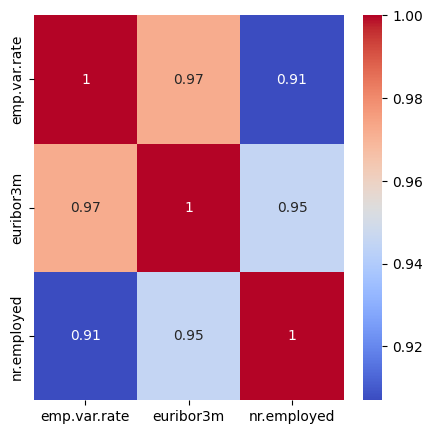

In [11]:
plt.figure(figsize=(5, 5))
sns.heatmap(df[['emp.var.rate', 'euribor3m', 'nr.employed']].corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

EDA Findings and Proposals

    - No missing or available data (good news)
    - y = yes is ~ 11% (High Imbalance) - Will use different methods to create train and test data.
    - pdays = 999 is very high ~ 96% - Will make this feature as boolean (999 - 1 and others to 0)
    - emp.var.rate is very highly correlated with nr.employed (97%) - Remove emp.var.rate

In [12]:
# Create a backup dataframe
DF = df.copy()

In [13]:
# Make pdays freature to boolean and drop [pdays and emp.var.rate]
DF['pdays999'] = (DF['pdays'] == 999) # Create a new column with boolean value of "True" for 999
DF.drop(['pdays', 'emp.var.rate'], axis=1, inplace=True)

# Make column 'y' as boolean
DF['y'] = DF['y'].replace({'yes':1, 'no':0})

In [14]:
# Create list of catagorical columns and numeric columns
DF_catgorical_cols = DF.select_dtypes(include=['object']).columns
DF_numeric_cols = DF.select_dtypes(exclude=['object']).columns

In [15]:
# Do one-hot encoding for the categorical variables
DF = pd.get_dummies(data=df, columns=DF_catgorical_cols, drop_first=True)
DF.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

In [16]:
X = DF.drop('y', axis=1)
y = DF['y']
X.shape, y.shape

((41188, 53), (41188,))

In [17]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30891, 53), (30891,), (10297, 53), (10297,))

In [18]:
# Logistic Regression:
model1 = LogisticRegression(random_state=1, max_iter= 100)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
AS = accuracy_score(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)
CR = classification_report(y_test, y_pred)
print('Accuracy Score: ', AS)
print('Confusion Matrix: ', CM)
print('Classification Report: ', CR)

Accuracy Score:  0.9089055064581917
Confusion Matrix:  [[8891  241]
 [ 697  468]]
Classification Report:                precision    recall  f1-score   support

          no       0.93      0.97      0.95      9132
         yes       0.66      0.40      0.50      1165

    accuracy                           0.91     10297
   macro avg       0.79      0.69      0.72     10297
weighted avg       0.90      0.91      0.90     10297



In [19]:
def accuracy_report(model, values_list): # This function will assess model performance, Given a sklear model it will predict and measure performance for both Test and Train Data
    # Train:
    print('Train Data: \n--------------------------------')
    pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, pred_train)
    print('Accuracy Score: ', round(accuracy_train, 4))
    print(classification_report(y_train, pred_train, target_names=values_list))
    roc_plot(model, X_train, y_train, values_list)
    plot_confusion(y_train, pred_train)

    # Test:
    print('Test Data: \n---------------------------------')
    pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, pred_test)
    print('Accuracy Score: ', round(accuracy_test, 4))
    print(classification_report(y_test, pred_test, target_names=values_list))
    roc_plot(model, X_test, y_test, values_list)
    accuracy_test = accuracy_score(y_test, pred_test)
    plot_confusion(y_test, pred_test)

def roc_plot(model, X_data, y_data, values_list):
    y_score = model.predict_proba(X_data)[:, 1]
    y_data = y_data.map({values_list[0]: 0, values_list[1]: 1})
    fpr, tpr, thresholds = roc_curve(y_data, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(3, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend (loc="lower right")
    plt.show()

def plot_confusion(y_test,y_pred):
    plt.figure(figsize=(3, 2))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="d")
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

Train Data: 
--------------------------------
Accuracy Score:  0.9087
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     27416
         yes       0.66      0.39      0.49      3475

    accuracy                           0.91     30891
   macro avg       0.79      0.68      0.72     30891
weighted avg       0.90      0.91      0.90     30891



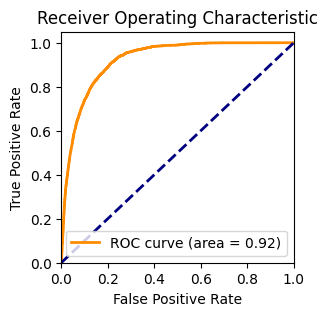

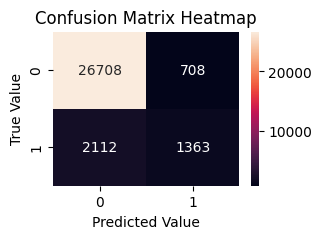

Test Data: 
---------------------------------
Accuracy Score:  0.9089
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      9132
         yes       0.66      0.40      0.50      1165

    accuracy                           0.91     10297
   macro avg       0.79      0.69      0.72     10297
weighted avg       0.90      0.91      0.90     10297



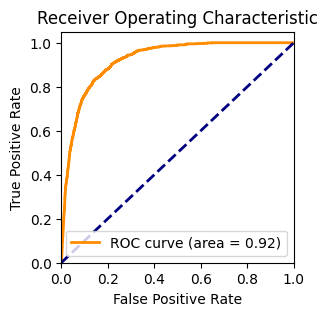

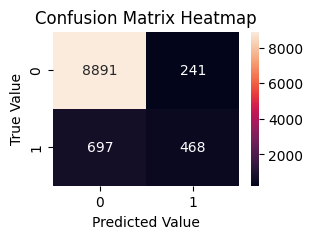

In [20]:
accuracy_report(model1, ['no', 'yes'])

Train Data: 
--------------------------------
Accuracy Score:  0.8688
              precision    recall  f1-score   support

          no       0.93      0.92      0.93     27416
         yes       0.43      0.49      0.45      3475

    accuracy                           0.87     30891
   macro avg       0.68      0.70      0.69     30891
weighted avg       0.88      0.87      0.87     30891



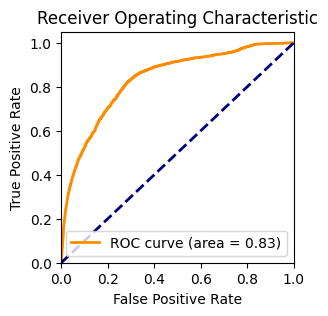

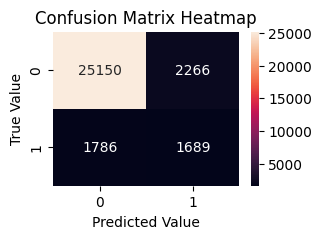

Test Data: 
---------------------------------
Accuracy Score:  0.8674
              precision    recall  f1-score   support

          no       0.93      0.92      0.92      9132
         yes       0.42      0.48      0.45      1165

    accuracy                           0.87     10297
   macro avg       0.68      0.70      0.69     10297
weighted avg       0.88      0.87      0.87     10297



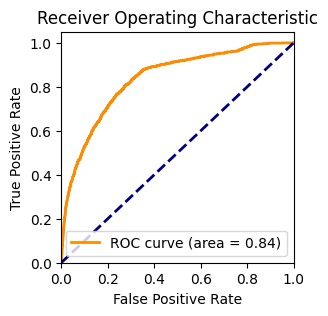

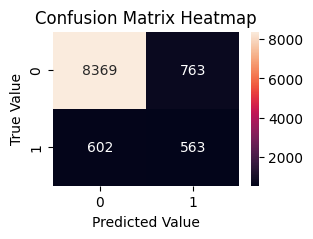

In [21]:
# SVM Model
model2 = SVC(kernel='linear',C=1, probability=True)
model2.fit(X_train, y_train)
accuracy_report(model2, ['no', 'yes'])

Train Data: 
--------------------------------
Accuracy Score:  0.8981
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     27416
         yes       0.64      0.22      0.33      3475

    accuracy                           0.90     30891
   macro avg       0.77      0.60      0.64     30891
weighted avg       0.88      0.90      0.88     30891



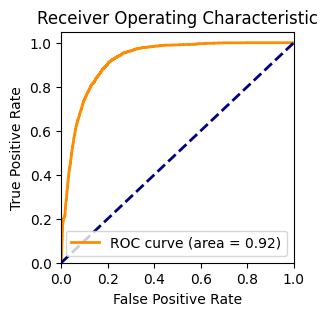

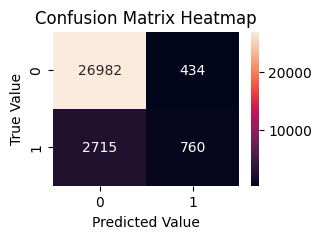

Test Data: 
---------------------------------
Accuracy Score:  0.8975
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9132
         yes       0.64      0.22      0.33      1165

    accuracy                           0.90     10297
   macro avg       0.77      0.60      0.64     10297
weighted avg       0.88      0.90      0.87     10297



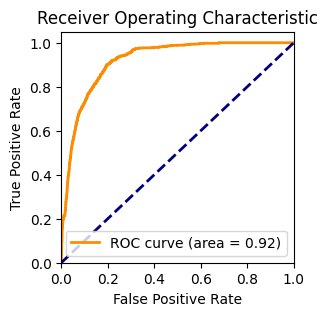

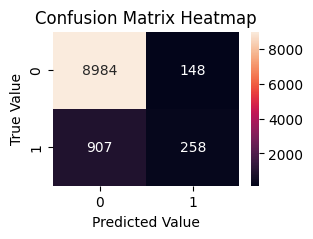

In [22]:
model3 = SVC(kernel='poly',C=1, probability=True)
model3.fit(X_train, y_train)
accuracy_report(model3, ['no', 'yes'])

Train Data: 
--------------------------------
Accuracy Score:  0.8979
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     27416
         yes       0.64      0.22      0.32      3475

    accuracy                           0.90     30891
   macro avg       0.77      0.60      0.63     30891
weighted avg       0.88      0.90      0.87     30891



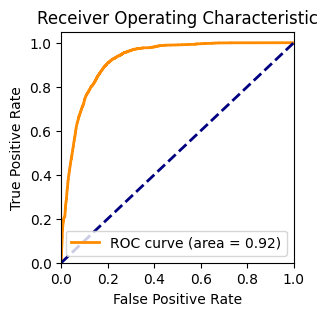

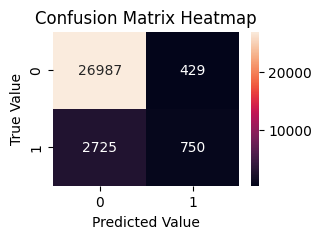

Test Data: 
---------------------------------
Accuracy Score:  0.8977
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9132
         yes       0.64      0.22      0.33      1165

    accuracy                           0.90     10297
   macro avg       0.77      0.60      0.64     10297
weighted avg       0.88      0.90      0.87     10297



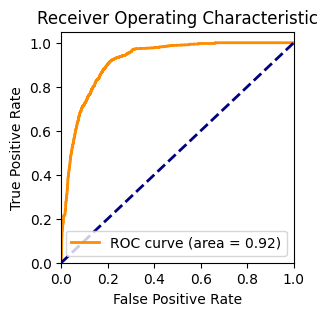

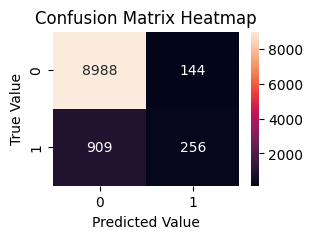

In [23]:
model4 = SVC(kernel='rbf',C=1, probability=True)
model4.fit(X_train, y_train)
accuracy_report(model4, ['no', 'yes'])

In [24]:
def accuracy_report2(model, values_list): # This function will assess model performance, Given a sklear model it will predict and measure performance for both Test and Train Data
    # Train:
    print('Train Data: \n--------------------------------')
    pred_train = model.predict(X_train.values) # Known issues with KNeighbors changed to X_train.values
    accuracy_train = accuracy_score(y_train, pred_train)
    print('Accuracy Score: ', round(accuracy_train, 4))
    print(classification_report(y_train, pred_train, target_names=values_list))
    roc_plot(model, X_train, y_train, values_list)
    plot_confusion(y_train, pred_train)

    # Test:
    print('Test Data: \n---------------------------------')
    pred_test = model.predict(X_test.values) # Known issues with KNeighbors changed to X_test.values
    accuracy_test = accuracy_score(y_test, pred_test)
    print('Accuracy Score: ', round(accuracy_test, 4))
    print(classification_report(y_test, pred_test, target_names=values_list))
    roc_plot(model, X_test, y_test, values_list)
    accuracy_test = accuracy_score(y_test, pred_test)
    plot_confusion(y_test, pred_test)

def roc_plot(model, X_data, y_data, values_list):
    y_score = model.predict_proba(X_data.values)[:, 1]
    y_data = y_data.map({values_list[0]: 0, values_list[1]: 1})
    fpr, tpr, thresholds = roc_curve(y_data, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(3, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend (loc="lower right")
    plt.show()

def plot_confusion(y_test,y_pred):
    plt.figure(figsize=(3, 2))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="d")
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

Train Data: 
--------------------------------
Accuracy Score:  0.9418
              precision    recall  f1-score   support

          no       0.96      0.98      0.97     27416
         yes       0.78      0.68      0.72      3475

    accuracy                           0.94     30891
   macro avg       0.87      0.83      0.85     30891
weighted avg       0.94      0.94      0.94     30891



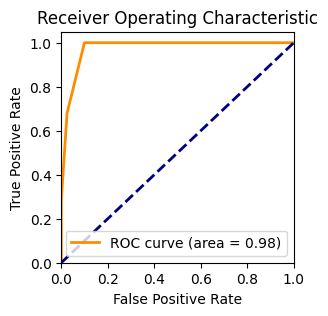

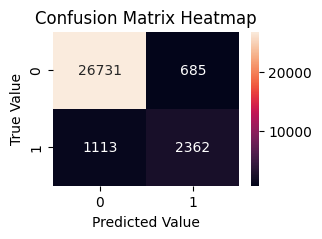

Test Data: 
---------------------------------
Accuracy Score:  0.9003
              precision    recall  f1-score   support

          no       0.94      0.95      0.94      9132
         yes       0.57      0.49      0.53      1165

    accuracy                           0.90     10297
   macro avg       0.75      0.72      0.74     10297
weighted avg       0.89      0.90      0.90     10297



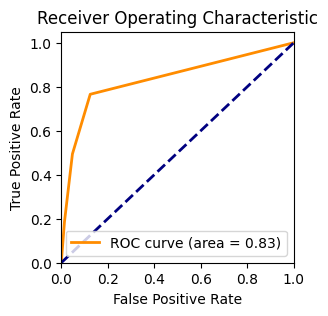

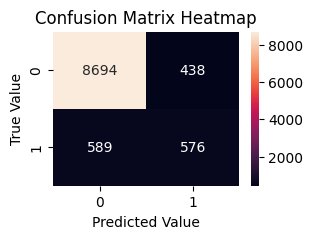

In [25]:
model5 = KNeighborsClassifier(n_neighbors=3)
model5.fit(X_train, y_train)
#accuracy_report(model5, ['no', 'yes']) # Known issues with KNeighbors changed to X_train.values
accuracy_report2(model5, ['no', 'yes'])


Train Data: 
--------------------------------
Accuracy Score:  0.9242
              precision    recall  f1-score   support

          no       0.94      0.98      0.96     27416
         yes       0.75      0.49      0.59      3475

    accuracy                           0.92     30891
   macro avg       0.84      0.73      0.77     30891
weighted avg       0.92      0.92      0.92     30891



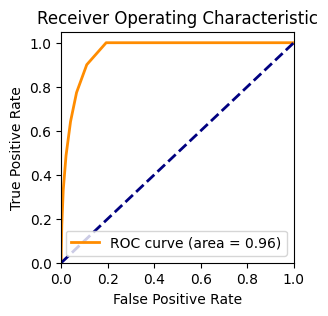

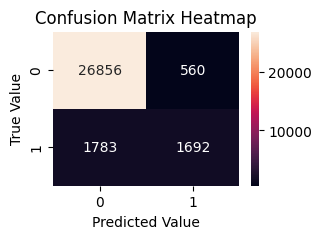

Test Data: 
---------------------------------
Accuracy Score:  0.9073
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      9132
         yes       0.63      0.43      0.51      1165

    accuracy                           0.91     10297
   macro avg       0.78      0.70      0.73     10297
weighted avg       0.90      0.91      0.90     10297



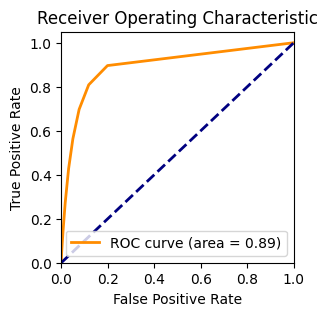

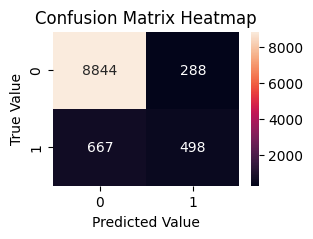

In [26]:
model6 = KNeighborsClassifier(n_neighbors=8, algorithm='ball_tree')
model6.fit(X_train, y_train)
#accuracy_report(model6, ['no', 'yes']) # Known issues with KNeighbors changed to X_train.values
accuracy_report2(model6, ['no', 'yes'])

Train Data: 
--------------------------------
Accuracy Score:  0.8723
              precision    recall  f1-score   support

          no       0.93      0.92      0.93     27416
         yes       0.44      0.48      0.46      3475

    accuracy                           0.87     30891
   macro avg       0.69      0.70      0.69     30891
weighted avg       0.88      0.87      0.87     30891



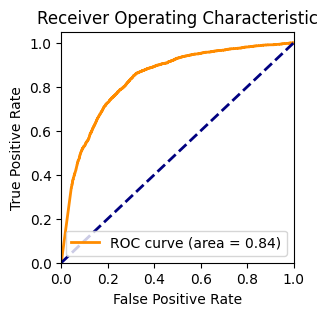

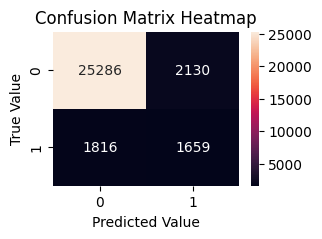

Test Data: 
---------------------------------
Accuracy Score:  0.8726
              precision    recall  f1-score   support

          no       0.93      0.92      0.93      9132
         yes       0.44      0.49      0.47      1165

    accuracy                           0.87     10297
   macro avg       0.69      0.71      0.70     10297
weighted avg       0.88      0.87      0.88     10297



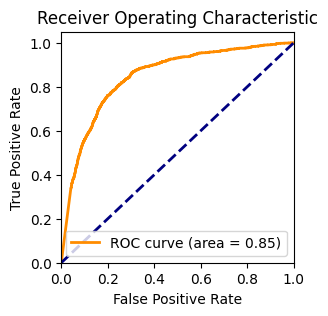

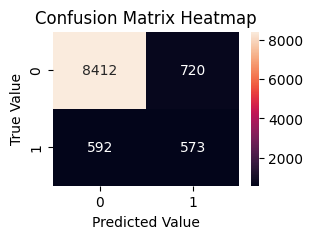

In [27]:
model7 = GaussianNB()
model7.fit(X_train, y_train)
accuracy_report(model7, ['no', 'yes'])